In [1]:
#pip install IPython

In [2]:
from IPython.display import HTML
HTML('<iframe src-http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data width = 300 height=200></iframe>')

/snap/jupyter/6/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [3]:
import os
os.getcwd()

'/home/kobby/Desktop'

In [4]:
import pandas as pd

df = pd.read_csv('/home/kobby/Desktop/iris.csv')

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# import load_iris function from datasets module

from sklearn.datasets import load_iris

/home/kobby/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [6]:
# save 'bunch' object containing iris dataset and its attribbutes
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [7]:
# print he iris data

#print(iris.data)

In [8]:
# print the names of the four features

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# print integers representing the species of each observation
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [11]:
# check the types of features and responses

print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
# check the shape of the features (1st dim = no. of observations, 2nd dim = no. of features)

print(iris.data.shape)

(150, 4)


In [13]:
#check the shape of the response (single dim matching number of observations)
print(iris.target.shape)

(150,)


In [14]:
# store feature matrix in X
X = iris.data

# store response vector in 'y'
y = iris.target

In [15]:
# print the shapes of x and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [16]:
# The steps for KNN

#step 1, import the class to use

from sklearn.neighbors import KNeighborsClassifier

In [17]:
#Step 2, Instantiate the estimator

# Estimator us Scikit-learn's term for model

# Instatiate means 'make an instance of'

knn = KNeighborsClassifier(n_neighbors = 1)

In [18]:
# Name of the object does not matter 
# Can specify tuning parameters (aka 'hyperparameter') during this step
#All parametrs not specified are set to their defualr values

print(knn)

KNeighborsClassifier(n_neighbors=1)


In [19]:
# step 3, fit the model with data (aka 'model training')
# model learns the relationship betwen X and y
# occurs in-place

knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [20]:
#Step 4, predict the response for new observations
# New observations are called 'out of sample' data
#Uses the information it learned durign the model training process

knn.predict([[3,5,4,2]])

array([2])

In [21]:
# return a NumPy Array
#Can predict for multiple observations at once
knn.predict([[3,5,4,2], [5,4,3,2]])

array([2, 1])

# Using a different value for K

In [22]:
#Instantiate the model (using the value k =5)
knn = KNeighborsClassifier(n_neighbors = 5)

# fit the model with data
knn.fit(X,y)
X_new = [[3,5,4,2], [5,4,3,2]]
# predict the response for new observations
knn.predict(X_new)

array([1, 1])

# Using a different classification model

In [23]:
# import the class

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X,y)

# predict the response for new observation
logreg.predict(X_new)

/home/kobby/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

In [24]:
# Model Evaluation process #1. Train and test on the entire dataset

#1. Train the model on the entire dataset
#2 Tets the model on the same dataset, and evaluate how well we did by comparing the predicted 
#response values with true response values.

# repeat the model training for, here we do with Logistic Regression first.

#since we have already fit the data/trained the model with the data, we make predictions for the entire X values
y_pred = logreg.predict(X)
len(y)

150

In [25]:
# Classification accuracy 

# proportion of correct prediction

# Common evaluation metric for classification problems

from sklearn import metrics
print('Prediction accuracy is: ', metrics.accuracy_score(y,y_pred))

# we got 1.0 prediction accuracy which represent 100% accuracy for the model

Prediction accuracy is:  0.9733333333333334


# Next we use KNN with $K = 5$

In [26]:
# we di not need to import again bcos we have already done that...

# we instantiate the model

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
y_pred_2 = knn.predict(X)

print('KNN prediction accuracy', metrics.accuracy_score(y,y_pred_2))

KNN prediction accuracy 0.9666666666666667


# Using $k = 1$

In [27]:
# KNN with k = 1 
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
y_pred_3 = knn.predict(X)

print('KNN_K = 1 prediction accuracy', metrics.accuracy_score(y,y_pred_3))

KNN_K = 1 prediction accuracy 1.0


# Evaluation procedure #2: Train/test split

### 1. Split the datasets into two pieces: a training set and a testing set

### 2. Train the model on the training set

### 3. Test the model on the testing set, and evaluate how well we did

In [28]:
# print the shapes of X and y again
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [29]:
# Step 1: split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 4)

In [30]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [31]:
# Step 2: train the model on the training set

logreg.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Step 3: make predictions on the testing set

y_preds = logreg.predict(X_test)

# compare the response values (y_test) with the predicted response values (y_preds)

print(metrics.accuracy_score(y_test, y_preds))

0.9666666666666667


 # Repeat for KNN with K = 5

In [33]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_predi = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_predi))

0.9666666666666667


# Repeat KNN for $K = 1$

In [34]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_predi = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_predi))

0.95


# Locating an even better value for K

In [35]:
# try k = 1 through k=25 and record testing accuracy

k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

<function matplotlib.pyplot.show(close=None, block=None)>

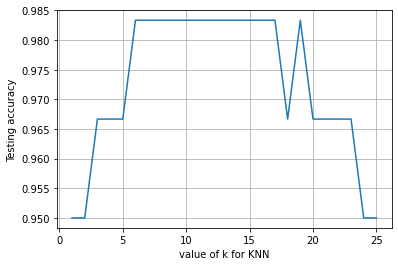

In [36]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

#allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and the testing accuracy
plt.plot(k_range, scores)
plt.xlabel('value of k for KNN')
plt.ylabel('Testing accuracy')
plt.grid()
plt.show

- Training accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex or not complex enough
- For KNN <b>models </b> complexity is determined by the value of <b>K</b> (lower value = more complex)

# Making preditcions on <b> out-of-sample </b> data

In [37]:
# instantiate the model with the best known parameters

knn = KNeighborsClassifier(n_neighbors = 11)

# train the model with X and y (not X_train and y_train)
knn.fit(X,y)

# make prediction for an out-of-sample observation
knn.predict([[3,5,4,2]])

array([1])

# Next Tutorials Agenda

- How do I use pandas library to read data into Python?
- How do I use seaborn library to visualize data?
- What is linear regression, and how does it work?
- How do I train and interpret a linear regression model in scikit-learn?
- What are some evaluation metrics for regression problems?
- How do I choose which feature to include in my model?

## Types of Supervised learning

- <b>Classification:</b> Predict a categorical response
- <b> Regression:</b> Predict a continuous response

In [38]:
# Reading Data using Pandas

# conventional way to import pandas
import pandas as pd


In [39]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('/home/kobby/Downloads/High-dimensional-data/data/Advertising.csv', index_col = 0)

# display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [40]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [41]:
data.shape

(200, 4)

# What are the features 
 - <b> TV </b>: adveetising dollars spent on TV for single product in a given market (in thousands of dollars
 - <b> Radio </b>: advertising dollars spent on Radio
 - <b> Newspaper </b> advertising dollars spent on Newspaper
 
 What is the response?
 - <b> Sales <b/> sales of the single product in a given market (in thousands of items
    
  What else do we know?
  - Because the response variables is continous, this is a regression problem.
  - There are 200 observations(represented by rows) and each is single market.
  
  # Visualiazing data with seaborn

In [42]:
# conventional way to import seaborn
#!pip install seaborn
import seaborn as sns

# allow plots to appear within notebook 
%matplotlib inline

/home/kobby/snap/jupyter/common/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


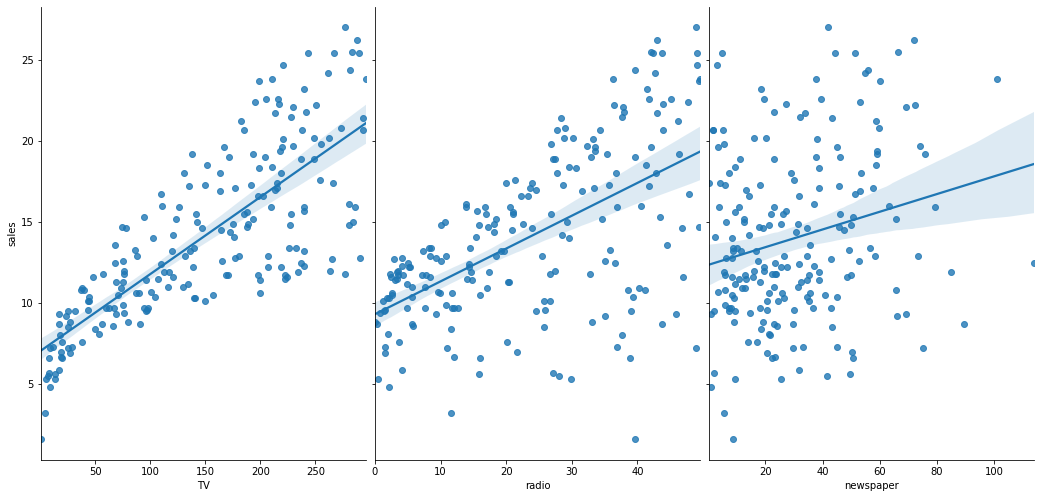

In [43]:
# visualize the relationship betwen the features and the response using scatterplots

sns.pairplot(data, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', size = 7, 
             aspect = 0.7, kind = 'reg')

# Linear regression 

- <b>Pros </b> fast, no tuning required, highly interpretable, well understood
- <b> Cons </b> unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n$
- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:
$ y = \beta_0 + \beta_1 \times TV + \beta_2\times Radio + \beta_3 \times Newspaper $ 

The $\beta$ values are the model coefficients. These values "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions

## Preparing X and y using pandas
- scikit-learn expects X(feature matrix) and y(response vector) to be NumPy arrays
- However, pandas is built on top of NumPy
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [44]:
# create a python list of feature names
feature_col = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_col]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

#print the first 5 rows

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [45]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [46]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces between the columns
y = data.sales

# print he first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

# Splitting X and y into training and testing sets

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 4)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Linear regression in scikit-learn

In [49]:
# importing module
from sklearn.linear_model import LinearRegression

# instantiate 
linreg = LinearRegression()

# fit the model to the training data(learn the coefficient)
linreg.fit(X_train,y_train)

LinearRegression()

# Interpreting the model coefficients

In [50]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

3.0940108608444614
[0.04585077 0.17764264 0.00247669]


In [51]:
# pair the feature names with coefficient
pd.DataFrame(zip(feature_col, linreg.coef_), columns = ['variables', 'coefficient'])

,variables,coefficient
0,TV,0.045851
1,radio,0.177643
2,newspaper,0.002477


$ y = 2.88 + 0.045851 \times TV + 0.177643 \times radio + 0.002477 \times newspaper $

How do we interpret the <b> TV coefficient </b> (0.045851)
- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a *0.045851* "unit" increase in sales
- or more clearly: for a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on *TV ads* is associated with an increase in sales of 45.85 items

- However, note that a negative coefficient indicates a decrease in the response variable

# Making predictions 

In [52]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred.shape

(50,)

- We need evaluation metric in order to compare our predictions with the actual values

## Model evaluation metric for regression

- Evaluation metrics for classification problems such as accuracy are not useful for regression problems. Instead we need an evaluation metrics designed for comparing continuous values

- Let's create some examples numeric predictions, and calculate <b> three common evaluation metrics for regression problems </b>

In [53]:
# define true and predicted response values
true = [100,50,30,20]
pred = [90,50,50,30]

<b> Mean absolute Error (MAE) is the mean of the absolute values of the erros.
- $ \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat y_i| $

In [54]:
# Calculate MAE by hand
print((10+0+20+10)/4)

# using scikit-learn

from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


- Mean Squared Error
- $ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat y_i)^2 $

In [55]:
# Calculate MSE by hand
print((10**2+0**2+20**2+10**2)/4)

# using scikit-learn

from sklearn import metrics
print(metrics.mean_squared_error(true,pred))

150.0
150.0


- <b> Root Mean Sqaured Error </b> (RMSE) is the square root of the mean of the sqaured erros:

- $ \sqrt {\frac{1}{n} \sum_{i=1}^{n}(y_i-\hat y_i)^2} $

In [56]:
# Calculate PMSE by hand

import numpy as np
print(np.sqrt((10**2 +0**2+20**2+10**2)/4))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


#### Comparing these metrics
- <b> MAE </b> is the easiest to understand, because it's the average error
- <b> MSE </b> is more popular than MAE because MSE punishes larger errors 
- <b> RMSE </b> is even more popular than MSE, because RMSE is interpretable in the "y" units

In [57]:
#### computing the RMSE for our sales predictions

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4459051240315899


### Feature Selection 
- Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
- Let's <b> remove </b> it from the model and check the RMSE!

In [58]:
# Create a python list of features names
feature_cols = ['TV', 'radio']

# use the lsit to select a subset of the original DataFrame
X = data[feature_cols]

# select a series from the DataFrame
y = data.sales

#split into training and testing sets
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state = 1)

#fit the model to the training data(to learn coefficient)
linreg.fit(X_train,y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE ofour predictions
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3879034699382888


- The RMSE decresed when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

# Cross-validation for parameter tuning, model selection, and feature selection

- What is the drawback of using the train/test split procedure for model evaluation
- How does K-fold cross validation overcome this limitation?
- How can cross-validation be used for selecting tuning paramters, choosing between models and selecting features?
- What are some improvements in cross-validation?

In [59]:
 # repeating what has been done before in previous session
    
    #import relevants functions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [60]:
# store the data in iris
from sklearn.datasets import load_iris

iris = load_iris()

# create X (features), and y (response)
X = iris.data
y = iris.target

In [61]:
# use train/test split with different random_state values
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 2)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


- <b> Question </b>: What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?
- <b> Answer </b>: That's the essence of cross-validation, but due to modification it is now known as - <b> model_selection <b>



## Steps for K-fold model selection

- Split the datasets into <B> K</b> equal partitions (known as folds)
- Use fold 1 as a testing set and the union of otheer folds as training set
- Calculate testing accuracy (here, train on training set, test on testing set and calculate the testing accuracy)
- Repeat steps 2 and 3 K times, using different fold as testing set each time.
- Use the average testing accuracy as the estimate of out-of-sample accuracy, also known as cross validation accuracy.

In [62]:
import numpy as np

# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf_splits = KFold(n_splits=5, shuffle = False)
n = np.array([[np.arange(0,25)]])

kf = kf_splits.get_n_splits(n)
# print the contents of each training and testing set

print('{} {:^61} {}'.format('Iteration', 'Training set observation', 'Testing set observation'))
for iteration, data in enumerate(kf, start = 1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], data[1]))

Iteration                   Training set observation                    Testing set observation


TypeError: 'int' object is not iterable

In [ ]:
np.array([[np.arange(0,25)]])

## Cross validation recommendations

1. K can be any number but k = 10 is generally recommended
2. For classification problems, stratified sampling is recommended for creating the folds.
- Each response class should be represented with equal proportions in each of the K folds
- scikit-learn's cross_val_score function does this by default

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 10 fold cross-validation with k=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn,X,y, cv = 10, scoring = 'accuracy')
print (scores)

In [ ]:
# use average accuracy as an estimate for out-of-sample accuracy
print(scores.mean())

In [ ]:
# search for an optimal value for K for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN(x-axis) versus the cross val accuracy(y-axis)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Val_Accuracy')
plt.grid()
plt.show

## Cross- validation example: model selection 

<b> Goal </b> Compare the best KNN model with logistic regression on the iris dataset


In [ ]:
# 10 fold cross validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X,y, cv = 10, scoring = 'accuracy').mean())

In [ ]:
# 10 fold cross val with logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lgbf')
print(cross_val_score(logreg, X,y, cv = 10, scoring = 'accuracy').mean())

# Cross Validation example: Feature selection 

<b> Goal </b>: Select whether the Newspaper feature should be included in the linear regression model in advertising dataset


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
# read dataset into python
data = pd.read_csv('/home/kobby/Downloads/High-dimensional-data/data/Advertising.csv', index_col = 0)

# create a python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the dataframe
X= data[feature_cols]

# select the target column, thus sales
y = data.sales

In [ ]:
# 10 fold cross validation with all three features
linreg = LinearRegression()  #instantiating the model
scores = -(cross_val_score(linreg, X, y, cv =10, scoring = 'neg_mean_squared_error'))
print(scores.mean())

#We compute the root of MSE since it is directly computed from the cross_val_score
aveg_score = (np.sqrt(scores)).mean()
aveg_score

In [ ]:
# 10 fold cross validation with features (removing Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
scores = -(cross_val_score(linreg, X, y, cv =10, scoring = 'neg_mean_squared_error'))
print((np.sqrt(scores)).mean())

- BY comparison, the model excluding the Newspaper is the best model

### More efficient parameter tuning using GridSearchCV

- Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# store the data in iris
from sklearn.datasets import load_iris

iris = load_iris()

# create X (features), and y (response)
X = iris.data
y = iris.target

In [ ]:
# define the parameter values that should be search 
k_range = np.arange(1,31)
print(k_range)

In [ ]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)
print(param_grid)

In [ ]:
#instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy')


- You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)

In [ ]:
# fit the grid with data
grid.fit(X,y)

In [ ]:
# view the complete results (list of named tuples)
grid.cv_results_
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

In [ ]:
# examine the first tuple 
#print(cv_results.params)
#print(cv_results.mean_train_score)
#print(cv_results.mean_test_score)

In [ ]:
# create a list of the mean scores only
#grid_mean_score = [cv_results.mean_test_score for result in cv_results]
mean_k = cv_results.mean_test_score

In [ ]:
# plot the results 

plt.plot(k_range, mean_k, 
         label = 'Best k value for KNN ', 
         color = 'red')
plt.xlabel("Range of k for KNN")
plt.ylabel("Model Selection Accuracy")
plt.grid()
plt.show()

In [ ]:
# examine the best model 
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

###  Searching multilple parameters simulataneously
- Example: tuning max_depth and min_sample_leaf for a DecisionTreeClassifier
- Could tune parameters independently: change max_depth while leaving min_samples_leaf at its default
- But, best performance might be achieved when neither parameter is at its default value 

In [ ]:
# define the parameter values that should be searched
weight_options = ['uniform', 'distance']

In [ ]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)

In [ ]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)

In [ ]:
# view the complete results
cv = pd.DataFrame(grid.cv_results_)

In [ ]:
# examine the best model

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

### Using the best parameters to make predictions

In [ ]:
# train your model using all data and the best known parameter
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform')
knn.fit(X,y)

#make a prediction on out of sample data

knn.predict([[3,5,4,2]])

In [ ]:
# shortcut: GridSearchCV automatically refits the best mmodel using all of the data

grid.predict([[3,5,4,2]])

#### Reducing computational expense using RandomizedSearchCV
- Searching many different parameters at once may be computationally infeasible
- RandomizedSearchCV searches a subset of the parameters, and you control the computationa 'budget'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# specify "parameter distribution" rather than a 'parameter grid'
param_dist = dict(n_neighbors =k_range, weights = weight_options)

- Specify a continuous distribution (rather than a list of values) for any continuous parameters

In [ ]:
# n_iter controls the number of searches

rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = 'accuracy', n_iter = 10, random_state = 5)
rand.fit(X,y)
rand_results = pd.DataFrame(rand.cv_results_)

In [ ]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

In [ ]:
# Run the RandomizedSearchCV 20 times (with n_iter = 10) and record the best score
best_scores = []
for i in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = 'accuracy', n_iter = 10, random_state = 5)
    rand.fit(X,y)
    best_scores.append(round(rand.best_score_, 3))
print (pd.DataFrame(best_scores))

# Encoding Categorical feature using scikit-learn

In [63]:
import pandas as pd
import os
os.getcwd()

'/home/kobby/Desktop'

In [64]:
df = pd.read_csv('/home/kobby/Desktop/titanic_train.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
# columns with no values 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
filtered_cols= ['survived', 'Pclass', 'Sex', 'Embarked']
#(df.reindex(index = df.Embarked.notna()), df.reindex(columns = filtered_cols))
#df = df.loc[df.Embarked.notna(), reindex(columns = filtered_cols)]

In [67]:
tr = [((df.Embarked.notna()), df.reindex(columns = filtered_cols))]
tr

[(0      True
  1      True
  2      True
  3      True
  4      True
         ... 
  886    True
  887    True
  888    True
  889    True
  890    True
  Name: Embarked, Length: 891, dtype: bool,
       survived  Pclass     Sex Embarked
  0         NaN       3    male        S
  1         NaN       1  female        C
  2         NaN       3  female        S
  3         NaN       1  female        S
  4         NaN       3    male        S
  ..        ...     ...     ...      ...
  886       NaN       2    male        S
  887       NaN       1  female        S
  888       NaN       3  female        S
  889       NaN       1    male        C
  890       NaN       3    male        Q
  
  [891 rows x 4 columns])]

In [68]:
df.shape

(891, 12)

In [69]:
#df.isna().sum()

In [70]:
#df = df.loc[df.Embarked.notna()]

filtered_cols= ['Survived', 'Pclass', 'Sex', 'Embarked']

data = df[filtered_cols]
data.shape

(891, 4)

In [73]:
#tip.isna().sum()

In [74]:
 data.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [75]:
X = data.loc[:, ['Pclass']]
y = data.Survived
X.shape, y.shape

((891, 1), (891,))

In [76]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs')

from sklearn.model_selection import cross_val_score

cross_val_score(logreg, X,y, cv = 5, scoring ='accuracy').mean()


0.6790973573535873

In [77]:
y.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [78]:
data.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [79]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

In [80]:
# pd.DataFrame(ohe.fit_transform(data[['Sex']]), columns = ['female', 'male'])

In [83]:
X = data.drop('Survived', axis = 'columns')
X.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [84]:
from sklearn.compose import make_column_transformer

In [85]:

from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
(OneHotEncoder(), ['Sex', 'Embarked']), remainder = 'passthrough')

In [86]:
column_trans.fit_transform(X)

array([[0., 1., 0., ..., 1., 0., 3.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 3.],
       ...,
       [1., 0., 0., ..., 1., 0., 3.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 3.]])

In [87]:
from sklearn.pipeline import make_pipeline

In [88]:
pipe = make_pipeline(column_trans, logreg)

In [89]:
cross_val_score(pipe,X, y, cv = 5, scoring = 'accuracy').mean()

0.7732973447994476

In [90]:
X_new = X.sample(5, random_state = 99)
X_new

,Pclass,Sex,Embarked
247,2,female,S
823,3,female,S
566,3,male,S
666,2,male,S
199,2,female,S


In [91]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('logisticregression', LogisticRegression())])

In [92]:
pipe.predict(X_new)

array([1, 1, 0, 0, 1])